<a href="https://colab.research.google.com/github/Layana7592/Machine_Learning_Projects/blob/main/Startup_Profit_Prediction_OneHotEncoding_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Profit Prediction Using Linear Regression with One-Hot Encoding

**Importing Libraries and Reading the 50 Startups Dataset**

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


**Initial Data Exploration: Head, Tail, Missing Values, and Data Types**

In [63]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [64]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [65]:
df.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [66]:
df.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


**State-wise Distribution of Startups (Bar Chart and Pie Chart)**

In [67]:
df1=df['State'].value_counts()
df1

,count
State,
New York,17
California,17
Florida,16


**Bar Chart (State vs Count)**

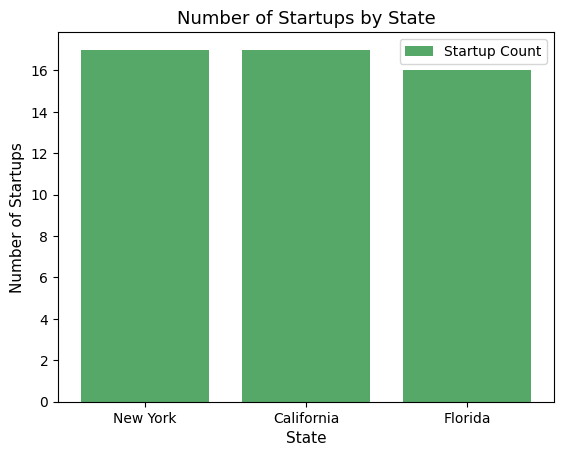

In [68]:
plt.bar(df1.index,df1.values,color='#55A868')
plt.xlabel("State", fontsize=11)
plt.ylabel("Number of Startups", fontsize=11)
plt.title("Number of Startups by State", fontsize=13)



plt.legend(["Startup Count"], loc="upper right")

**Pie Chart (State Distribution)**

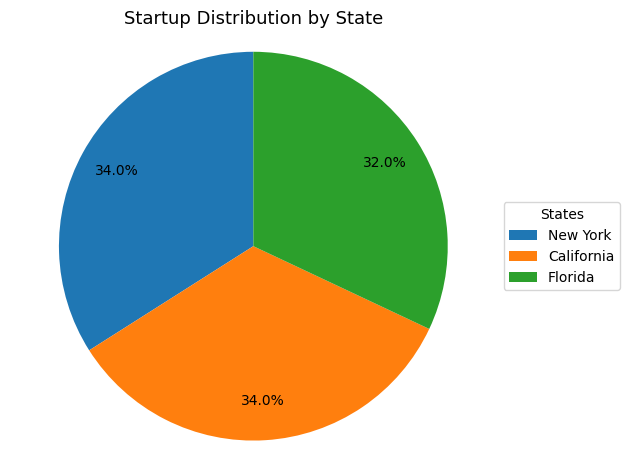

In [69]:
plt.pie(df1.values,autopct='%1.1f%%',startangle=90,pctdistance=0.8)

plt.title("Startup Distribution by State", fontsize=13)

plt.legend(df1.index,title="States",loc="center left",bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Ensures circular pie
plt.tight_layout()
plt.show()

**Separating Features (X) and Target Variable (Y)**

In [70]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [71]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

**Regression Analysis of R&D Spend, Administration, and Marketing Spend vs Profit**

<Axes: xlabel='R&D Spend', ylabel='Profit'>

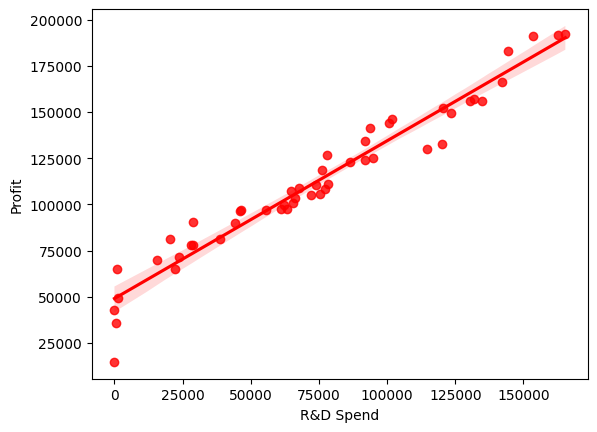

In [72]:
sns.regplot(x=df['R&D Spend'],y=y,color='r')

<Axes: xlabel='Administration', ylabel='Profit'>

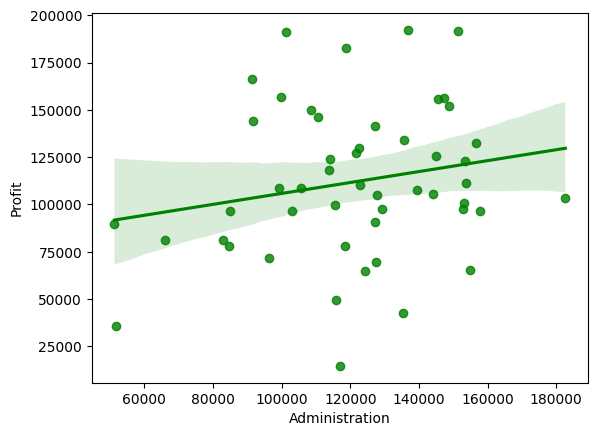

In [73]:
sns.regplot(x=df['Administration'],y=y,color='g')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

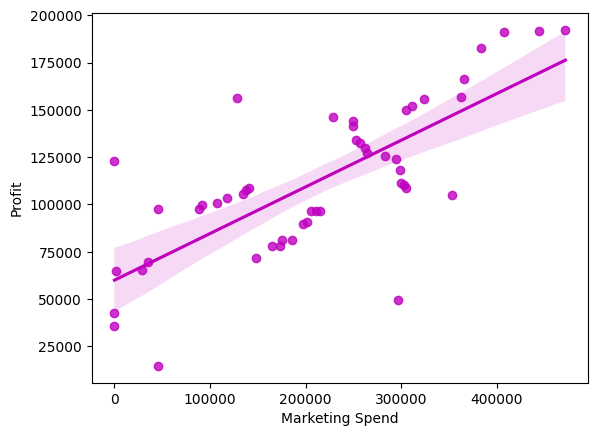

In [74]:
sns.regplot(x=df['Marketing Spend'],y=y,color='m')

**Handling Categorical Variables Using One-Hot Encoding**

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


end=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']),remainder='passthrough')
x=end.fit_transform(x)
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [76]:
x.shape

(50, 6)

**Splitting the Dataset Into Training and Testing Sets**

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.7892920e+04,
        8.4710770e+04, 1.6447071e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3154600e+03,
        1.1581621e+05, 2.9711446e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.3542692e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1452361e+05,
        1.2261684e+05, 2.6177623e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.2333488e+05,
        1.0867917e+05, 3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8013110e+04,
        1.2159755e+05, 2.6434606e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 7.7044010e+04,
        9.9281340e+04, 1.4057481e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.6426070e+04,
        1.5769392e+05, 2.1079767e+05],
       [0.0000000e+00, 0.0000000e+00,

**Training the Linear Regression Model and Making Predictions**

In [78]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([126187.39411505,  85788.82259512,  99777.02815178,  45706.12238329,
       127062.20722772,  51891.83884459, 109114.62977495, 100600.61123702,
        97953.99874716, 111730.5770681 , 128818.49200668, 174195.35772631,
        93736.28538438, 148381.0409716 , 172313.87139388])

**Comparing Actual vs Predicted Values**

In [79]:
df1=pd.DataFrame({'Actual_value ':y_test,
                  'Predicted_value ':y_pred,
                  'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
13,134307.35,126187.394115,8119.955885
39,81005.76,85788.822595,-4783.062595
30,99937.59,99777.028152,160.561848
45,64926.08,45706.122383,19219.957617
17,125370.37,127062.207228,-1691.837228
48,35673.41,51891.838845,-16218.428845
26,105733.54,109114.629775,-3381.089775
25,107404.34,100600.611237,6803.728763
32,97427.84,97953.998747,-526.158747
19,122776.86,111730.577068,11046.282932


**Importing Regression Evaluation Metrics (MAE, MAPE, MSE, RMSE, R²)**

In [80]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [81]:
print("MAE :",mean_absolute_error(y_test,y_pred))

MAE : 7395.433531521974


In [82]:
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))

MAPE : 0.08929865344172414


In [83]:
print("MSE :",mean_squared_error(y_test,y_pred))

MSE : 84826955.03529756


In [84]:
print("RMSE :",root_mean_squared_error(y_test,y_pred))

RMSE : 9210.154995183173


In [85]:
print("r2 Score :",r2_score(y_test,y_pred))

r2 Score : 0.9397108063356046
